# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


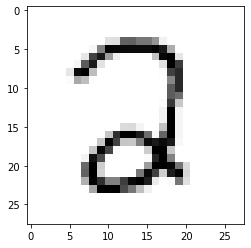

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2538183551995663
train accuracy is: 0.48940076781839426, test accuracy is 0.49193548387096775


Epoch 10 Loss 0.19194591744768813
train accuracy is: 0.8747287598063762, test accuracy is 0.8966733870967742


Epoch 20 Loss 0.0992998057834193
train accuracy is: 0.9114505090969788, test accuracy is 0.920866935483871


Epoch 30 Loss 0.06273635104908651
train accuracy is: 0.9352361876147555, test accuracy is 0.9440524193548387


Epoch 40 Loss 0.04847767611923943
train accuracy is: 0.9471707561342013, test accuracy is 0.9556451612903226


Epoch 50 Loss 0.04124119705697471
train accuracy is: 0.9535136037389418, test accuracy is 0.9611895161290323


Epoch 60 Loss 0.03693329657013432
train accuracy is: 0.958020363879152, test accuracy is 0.9647177419354839


Epoch 70 Loss 0.03407140646702521
train accuracy is: 0.9606910365548322, test accuracy is 0.9657258064516129


Epoch 80 Loss 0.03200969281968592
train accuracy is: 0.9628609581038224, test accuracy is 0.967741935483871


Epoch 90 Loss 0.030426356380501816
train accuracy is: 0.9649474211316975, test accuracy is 0.967741935483871


Epoch 100 Loss 0.029162297328269794
train accuracy is: 0.9659489233850777, test accuracy is 0.9682459677419355


Epoch 110 Loss 0.02811397870939179
train accuracy is: 0.9670338841595727, test accuracy is 0.9682459677419355


Epoch 120 Loss 0.027220499451457922
train accuracy is: 0.9677850108496078, test accuracy is 0.967741935483871


Epoch 130 Loss 0.02643509608277016
train accuracy is: 0.9689534301452178, test accuracy is 0.9672379032258065


Epoch 140 Loss 0.025725666175626806
train accuracy is: 0.9694541812719079, test accuracy is 0.9672379032258065


Epoch 150 Loss 0.025078009439886074
train accuracy is: 0.970372225004173, test accuracy is 0.9672379032258065


Epoch 160 Loss 0.024498664308838913
train accuracy is: 0.9711233516942079, test accuracy is 0.9667338709677419


Epoch 170 Loss 0.02395422923774046
train accuracy is: 0.971874478384243, test accuracy is 0.9672379032258065


Epoch 180 Loss 0.023453004782311826
train accuracy is: 0.9727090635953931, test accuracy is 0.967741935483871


Epoch 190 Loss 0.022978234125480147
train accuracy is: 0.9735436488065431, test accuracy is 0.9682459677419355


Epoch 200 Loss 0.0225313842725306
train accuracy is: 0.9744616925388082, test accuracy is 0.9692540322580645


Epoch 210 Loss 0.02210898216441217
train accuracy is: 0.9750459021866132, test accuracy is 0.9692540322580645


Epoch 220 Loss 0.02170702162467332
train accuracy is: 0.9757135703555333, test accuracy is 0.9702620967741935


Epoch 230 Loss 0.021323208551946523
train accuracy is: 0.9763812385244534, test accuracy is 0.9707661290322581


Epoch 240 Loss 0.020950680784068674
train accuracy is: 0.9763812385244534, test accuracy is 0.9717741935483871


0.010672300289656041

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.27196656760690746
train accuracy is: 0.5413119679519279, test accuracy is 0.5650201612903226


Epoch 10 Loss 0.10638049176887608
train accuracy is: 0.9071106659989985, test accuracy is 0.9238911290322581


Epoch 20 Loss 0.08055769505155709
train accuracy is: 0.9251377065598397, test accuracy is 0.9390120967741935


Epoch 30 Loss 0.06903818355327994
train accuracy is: 0.9344850609247204, test accuracy is 0.9460685483870968


Epoch 40 Loss 0.06220307743287611
train accuracy is: 0.9397429477549658, test accuracy is 0.9536290322580645


Epoch 50 Loss 0.05757441005852827
train accuracy is: 0.9443331664162911, test accuracy is 0.9551411290322581


Epoch 60 Loss 0.054188826386713004
train accuracy is: 0.9471707561342013, test accuracy is 0.9566532258064516


Epoch 70 Loss 0.05157685270661527
train accuracy is: 0.9490068435987314, test accuracy is 0.9591733870967742


Epoch 80 Loss 0.04948688303928916
train accuracy is: 0.9505090969788015, test accuracy is 0.9606854838709677


Epoch 90 Loss 0.047766024930748364
train accuracy is: 0.9515105992321816, test accuracy is 0.9616935483870968


Epoch 100 Loss 0.046316757265389696
train accuracy is: 0.9528459355700217, test accuracy is 0.9627016129032258


Epoch 110 Loss 0.04507466663315959
train accuracy is: 0.9537639793022867, test accuracy is 0.9621975806451613


Epoch 120 Loss 0.04399489262603809
train accuracy is: 0.9542647304289767, test accuracy is 0.9627016129032258


Epoch 130 Loss 0.04304504372562267
train accuracy is: 0.9550993156401268, test accuracy is 0.9632056451612904


Epoch 140 Loss 0.04220058991456717
train accuracy is: 0.9556000667668169, test accuracy is 0.9647177419354839


Epoch 150 Loss 0.0414421700362297
train accuracy is: 0.956434651977967, test accuracy is 0.9647177419354839


Epoch 160 Loss 0.04075800139583852
train accuracy is: 0.956685027541312, test accuracy is 0.9647177419354839


Epoch 170 Loss 0.040134813927282645
train accuracy is: 0.956935403104657, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.039564980117862365
train accuracy is: 0.957686529794692, test accuracy is 0.9647177419354839


Epoch 190 Loss 0.03904070833264344
train accuracy is: 0.9583541979636121, test accuracy is 0.9642137096774194


Epoch 200 Loss 0.03855636436103859
train accuracy is: 0.958604573526957, test accuracy is 0.9647177419354839


Epoch 210 Loss 0.03810646366647173
train accuracy is: 0.9594391587381071, test accuracy is 0.9642137096774194


Epoch 220 Loss 0.03768833871003109
train accuracy is: 0.9596060757803372, test accuracy is 0.9647177419354839


Epoch 230 Loss 0.03729745214101419
train accuracy is: 0.9601902854281422, test accuracy is 0.9647177419354839


Epoch 240 Loss 0.03693039900270169
train accuracy is: 0.9606075780337172, test accuracy is 0.9647177419354839


0.08150465988782962

### Comparing results of NN and LR

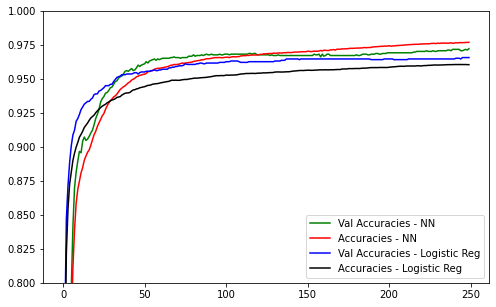

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

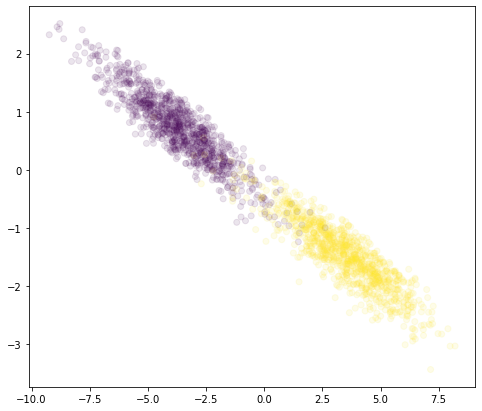

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

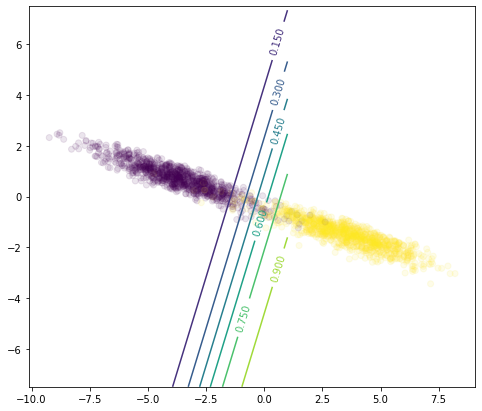

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );